## Sound classification

In [15]:
import utils.sound_utils as su
import utils.filter_utils as filter

import os
import sys
import importlib
import numpy as np

importlib.reload(su)
importlib.reload(filter)




<module 'filter' from 'c:\\Users\\gonza\\OneDrive\\Documentos\\Gonzalo\\Especializacion\\inteligencia_embebida\\esp32_loopback\\python\\filter.py'>

### Audio filter

c:\Users\gonza\OneDrive\Documentos\Gonzalo\Especializacion\inteligencia_embebida\esp32_loopback\python\sound_utils.py:10: WavFileWarning: Chunk (non-data) not understood, skipping it.
  return wavfile.read(path)


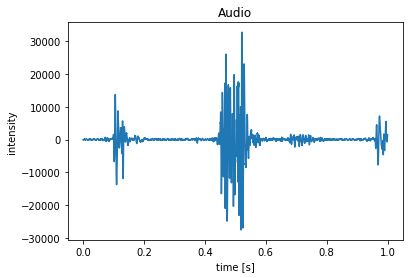

In [10]:
file_name = "audios_recording_01"
sample_rate, data = su.upload_audio_file(f"../data/{file_name}.wav")
data = data[:sample_rate] # Use the first second
su.plot_audio(data, sample_rate) 

#### Moving average

In [11]:
f_cutoff = 5
f_norm = f_cutoff / sample_rate
window_size = (0.196202 + f_norm ** 2) ** 0.5 / f_norm

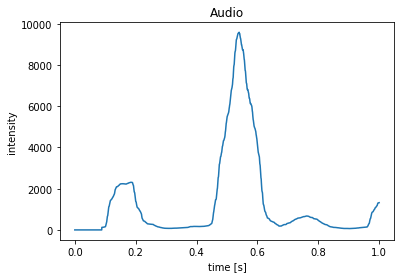

In [12]:
filter_ma = filter.MovingAverage(window_size=int(window_size))
filtered_data = []

for value in data:
    absolute = abs(value) if abs(value) >= 0 else np.iinfo(value.dtype).max
    filtered_data.append(filter_ma.calculate_ma(absolute))
su.plot_audio(filtered_data, sample_rate)

### Noise gate

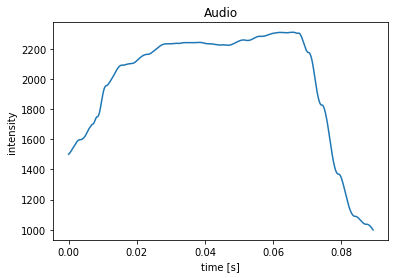

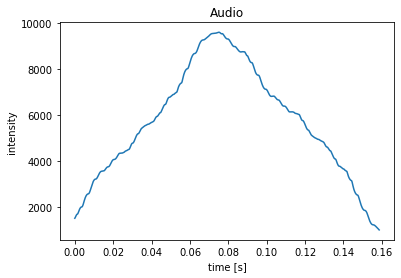

In [13]:
noise_gate = su.NoiseGate(open_threshold=1500, close_threshold=1000, hold=0)
filtered_data_list, init = noise_gate.split(filtered_data, sample_rate)
for data in filtered_data_list:
    su.plot_audio(data, sample_rate)

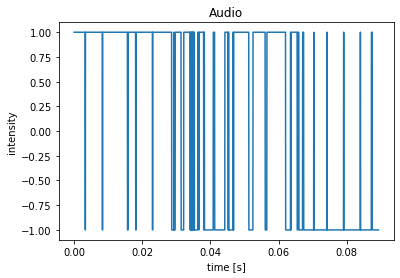

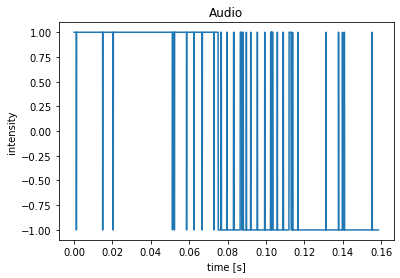

In [17]:
for data in filtered_data_list:
    su.plot_audio(np.sign(np.diff(data, append=0)), sample_rate)

### Extract features

In [14]:
extractor = su.FeatureExtractor(filtered_data_list[0], sample_rate)
extractor.extract_features()

[0.08934240362811792,
 2308.7501280081897,
 68,
 0.7907537354572917,
 385.38483673446547]